# Activity 14 - Submitted by group 2
Members - Aboobacker Sidhique Mukkil, Ajeesh LJ, Darsana Baburaj, Maya Mohan, Rasal V

### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around  10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.How will you help this NGO to make a correct decision based on socio-economic and health factors?



#### AIM:
we can help the NGO by making optimum number of clusters based on socio-economical health factors using KMeans and Hierarchial Clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
data=pd.read_csv("Downloads/Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### As we can see, there are no null values in the dataset

In [7]:
data['country'].nunique()

167

#### As we can see, there are no duplicate values in the dataset

In [8]:
df=data.drop('country',axis=1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


F:\Soft\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


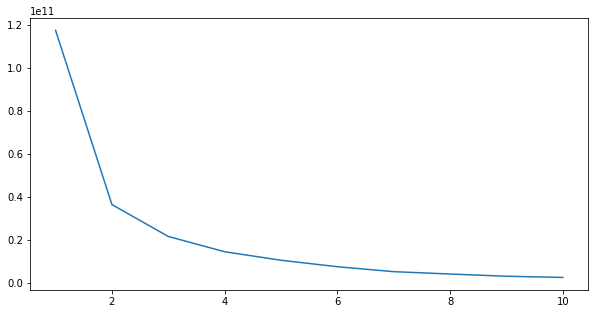

In [9]:
#Elbow method
plt.figure(figsize=(10,5))
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

plt.show()

In [10]:
#KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
labels_2 = kmeans.fit_predict(df)
labels_2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [12]:
#Silhoutte Score
from sklearn.metrics import silhouette_score
score_2 = silhouette_score(df, labels_2, metric='euclidean')
print('Silhouette Score: %.3f' % score_2)

Silhouette Score: 0.726


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

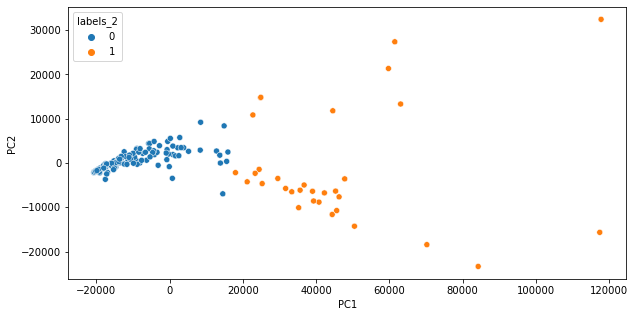

In [13]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
c = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
c['labels_2'] = labels_2
plt.figure(figsize=(10,5))
sns.scatterplot(x=c['PC1'],y=c['PC2'],hue=c['labels_2'])

In [14]:
#Normalization
from sklearn import preprocessing
X=preprocessing.normalize(df)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296
...,...,...,...,...,...,...,...,...,...
162,0.006974,0.011129,0.001254,0.012586,0.704517,0.000626,0.015046,0.000836,0.709293
163,0.000802,0.001337,0.000230,0.000826,0.773949,0.002153,0.003537,0.000116,0.633231
164,0.004980,0.015388,0.001462,0.017140,0.959588,0.002586,0.015623,0.000417,0.279969
165,0.012059,0.006426,0.001110,0.007368,0.959578,0.005055,0.014458,0.001000,0.280591


F:\Soft\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


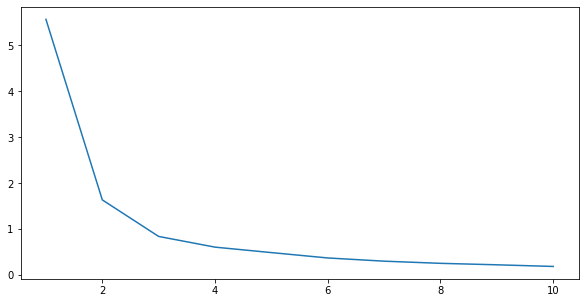

In [15]:
# Elbow method
plt.figure(figsize=(10,5))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

plt.show()

In [39]:
#KMeans
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
labels_no = kmeans1.fit_predict(X)
labels_no

array([1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1])

In [40]:
#Silhouette Score
score_no = silhouette_score(X, labels_no, metric='euclidean')
print('Silhouette Score: %.3f' % score_no)

Silhouette Score: 0.520


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

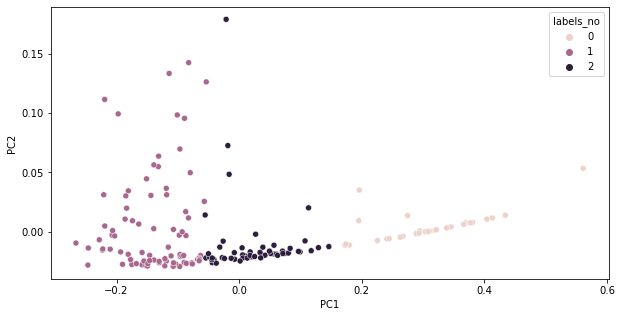

In [41]:
# Visualization
pca = PCA(n_components = 2)
b = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
b['labels_no'] = labels_no
plt.figure(figsize=(10,5))
sns.scatterplot(x=b['PC1'],y=b['PC2'],hue=b['labels_no'])

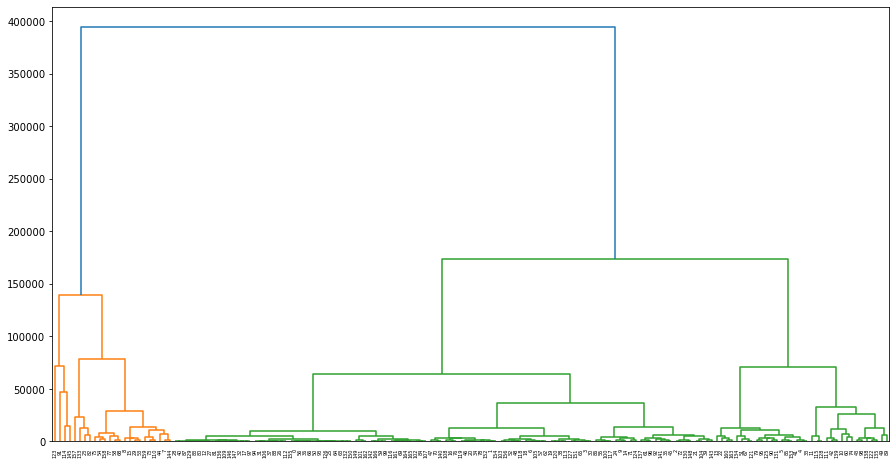

In [42]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

In [43]:
# Heirarchial Clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc=cluster.fit_predict(df)
labels_hc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
#Silhouette Score
score_hc = silhouette_score(df, labels_hc, metric='euclidean')
print('Silhouette Score: %.3f' % score_hc)

Silhouette Score: 0.723


In [45]:
#Heirarchial Clustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc1=cluster.fit_predict(X)
labels_hc1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [46]:
# Silhouette Score
score_hc1 = silhouette_score(df, labels_hc1, metric='euclidean')
print('Silhouette Score: %.3f' % score_hc1)

Silhouette Score: 0.543


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

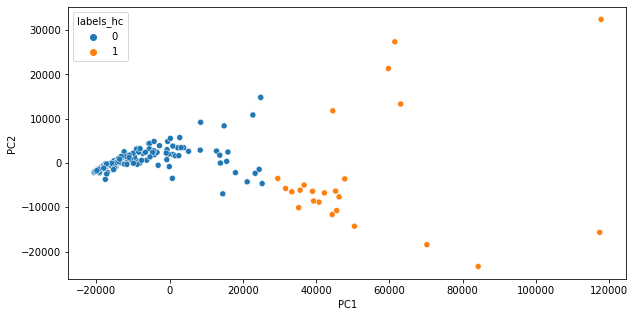

In [47]:
# Visualization
pca = PCA(n_components = 2)
a = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
a['labels_hc'] = labels_hc
plt.figure(figsize=(10,5))
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['labels_hc'])

In [48]:
data['labels_2']=labels_2
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


# CONCLUSION:
    
Based on Silhoutte score the best performing model was KMeans clustering for K=2.
The country names based on clustering are divided into priority and non priority countries.They are given below:

In [49]:
pc=data[data['labels_2']==0]
npc=data[data['labels_2']==1]

### priority countries:

In [50]:
pd.DataFrame(pc['country']).to_numpy()


array([['Afghanistan'],
       ['Albania'],
       ['Algeria'],
       ['Angola'],
       ['Antigua and Barbuda'],
       ['Argentina'],
       ['Armenia'],
       ['Azerbaijan'],
       ['Bahamas'],
       ['Bangladesh'],
       ['Barbados'],
       ['Belarus'],
       ['Belize'],
       ['Benin'],
       ['Bhutan'],
       ['Bolivia'],
       ['Bosnia and Herzegovina'],
       ['Botswana'],
       ['Brazil'],
       ['Bulgaria'],
       ['Burkina Faso'],
       ['Burundi'],
       ['Cambodia'],
       ['Cameroon'],
       ['Cape Verde'],
       ['Central African Republic'],
       ['Chad'],
       ['Chile'],
       ['China'],
       ['Colombia'],
       ['Comoros'],
       ['Congo, Dem. Rep.'],
       ['Congo, Rep.'],
       ['Costa Rica'],
       ["Cote d'Ivoire"],
       ['Croatia'],
       ['Czech Republic'],
       ['Dominican Republic'],
       ['Ecuador'],
       ['Egypt'],
       ['El Salvador'],
       ['Equatorial Guinea'],
       ['Eritrea'],
       ['Estonia'],
       ['Fi

### Non-priority countries:

In [36]:
pd.DataFrame(npc['country']).to_numpy()

array([['Australia'],
       ['Austria'],
       ['Bahrain'],
       ['Belgium'],
       ['Brunei'],
       ['Canada'],
       ['Cyprus'],
       ['Denmark'],
       ['Finland'],
       ['France'],
       ['Germany'],
       ['Greece'],
       ['Iceland'],
       ['Ireland'],
       ['Israel'],
       ['Italy'],
       ['Japan'],
       ['Kuwait'],
       ['Luxembourg'],
       ['Netherlands'],
       ['New Zealand'],
       ['Norway'],
       ['Oman'],
       ['Qatar'],
       ['Saudi Arabia'],
       ['Singapore'],
       ['Spain'],
       ['Sweden'],
       ['Switzerland'],
       ['United Arab Emirates'],
       ['United Kingdom'],
       ['United States']], dtype=object)